# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import pickle
from pathlib import Path

from nltk.corpus import stopwords, reuters

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aarticouture/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv('news_api')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_path = Path('btc_news.obj')
if btc_path.is_file():
    file = open(btc_path, 'rb')
    btc_headlines = pickle.load(file)
    file.close()
else:
    btc_headlines = newsapi.get_everything(
        q="bitcoin",
        language="en",
        page_size=100,
        sort_by="relevancy"
    )
    file = open(btc_path, 'wb')
    pickle.dump(btc_headlines, file)
    file.close()

print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

NameError: name 'bitcoin_headlines' is not defined

In [76]:

# Fetch the Ethereum news articles
eth_path = Path('eth_news.obj')
if eth_path.is_file():
    file = open(eth_path, 'rb')
    eth_headlines = pickle.load(file)
    file.close()
else:
    eth_headlines = newsapi.get_everything(
        q="ethereum",
        language="en",
        page_size=100,
        sort_by="relevancy"
    )
    file = open(eth_path, 'wb') 
    pickle.dump(eth_headlines, file)
    file.close()
    
print(f"Total articles about bitcoin: {eth_headlines['totalResults']}")

Total articles about bitcoin: 2595


In [77]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral
0,You won't have to stick to Bitcoin if you're d...,2021-09-16,0.5574,0.127,0.036,0.838
1,Four months after Twitter first introduced in-...,2021-09-23,0.0000,0.000,0.000,1.000
2,"<ul><li>Bitcoin, in terms of market value, ros...",2021-10-06,0.3400,0.076,0.000,0.924
3,Bitcoin and similar blockchain-based cryptos e...,2021-09-25,0.0000,0.000,0.000,1.000
4,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,2021-10-04,-0.2411,0.000,0.116,0.884


In [78]:
# Create the Ethereum sentiment scores DataFrame
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,text,Compound,Positive,Negative,Neutral
0,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000
1,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
2,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694
3,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.000,0.892
4,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.101,0.000,0.899


In [79]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.120557,0.051570,0.022570,0.925870
std,0.316833,0.059199,0.045962,0.073227
min,-0.709600,0.000000,0.000000,0.702000
25%,0.000000,0.000000,0.000000,0.878000
50%,0.000000,0.040000,0.000000,0.935000
75%,0.340000,0.084500,0.008500,1.000000
max,0.855500,0.240000,0.215000,1.000000


In [80]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.124043,0.056830,0.026670,0.916520
std,0.343010,0.066512,0.047668,0.084551
min,-0.757900,0.000000,0.000000,0.692000
25%,0.000000,0.000000,0.000000,0.847000
50%,0.000000,0.054000,0.000000,0.930000
75%,0.406800,0.094750,0.041000,1.000000
max,0.941300,0.308000,0.188000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [81]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [82]:
# Instantiate the lemmatizer
def tokenizer(article):
    lemmatizer = WordNetLemmatizer()
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output



# Create a list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [83]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,You won't have to stick to Bitcoin if you're d...,2021-09-16,0.5574,0.127,0.036,0.838,"[wont, stick, bitcoin, youre, determined, pay,..."
1,Four months after Twitter first introduced in-...,2021-09-23,0.0000,0.000,0.000,1.000,"[four, month, twitter, first, introduced, inap..."
2,"<ul><li>Bitcoin, in terms of market value, ros...",2021-10-06,0.3400,0.076,0.000,0.924,"[ullibitcoin, term, market, value, rose, lilii..."
3,Bitcoin and similar blockchain-based cryptos e...,2021-09-25,0.0000,0.000,0.000,1.000,"[bitcoin, similar, blockchainbased, cryptos, e..."
4,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,2021-10-04,-0.2411,0.000,0.116,0.884,"[jpmorgan, ceo, jamie, dimon, still, bitcoin, ..."


In [84]:
# Create a new tokens column for Ethereum
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000,"[country, latest, crackdown, digital, currenci..."
1,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838,"[wont, stick, bitcoin, youre, determined, pay,..."
2,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694,"[opensea, isnt, wasting, much, time, head, pro..."
3,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.000,0.892,"[robinhood, plan, start, cryptocurrency, walle..."
4,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.101,0.000,0.899,"[image, source, foundationappsideeyeingchloeim..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [85]:
from collections import Counter
from nltk import ngrams

In [86]:
# Generate the Bitcoin N-grams where N=2
btc_tokens = []
for token in bitcoin_df['tokens']:
    btc_tokens = btc_tokens + token
    
btc_tokens[0]

btc_bigrams = ngrams(btc_tokens, n=2)
Counter(btc_bigrams).most_common(10)

[(('illustration', 'taken'), 15),
 (('char', 'representation'), 11),
 (('bitcoin', 'seen'), 9),
 (('seen', 'illustration'), 9),
 (('el', 'salvador'), 8),
 (('cryptocurrency', 'bitcoin'), 8),
 (('reuters', 'bitcoin'), 8),
 (('sept', 'reuters'), 8),
 (('representation', 'cryptocurrency'), 7),
 (('taken', 'august'), 7)]

In [87]:
# Generate the Ethereum N-grams where N=2
eth_tokens = []
for token in eth['tokens']:
    eth_tokens = eth_tokens + token
    
eth_tokens[0]

eth_bigrams = ngrams(eth_tokens, n=2)
Counter(eth_bigrams).most_common(10)

[(('illustration', 'taken'), 14),
 (('nonfungible', 'token'), 10),
 (('taken', 'june'), 10),
 (('char', 'representations'), 9),
 (('representations', 'cryptocurrencies'), 8),
 (('bitcoin', 'ethereum'), 8),
 (('char', 'representation'), 7),
 (('cryptocurrencies', 'bitcoin'), 7),
 (('ripple', 'litecoin'), 7),
 (('placed', 'pc'), 7)]

In [88]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [89]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_bigrams)

[]

In [90]:
# Use token_count to get the top 10 words for Ethereum

token_count(eth_bigrams)


[]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

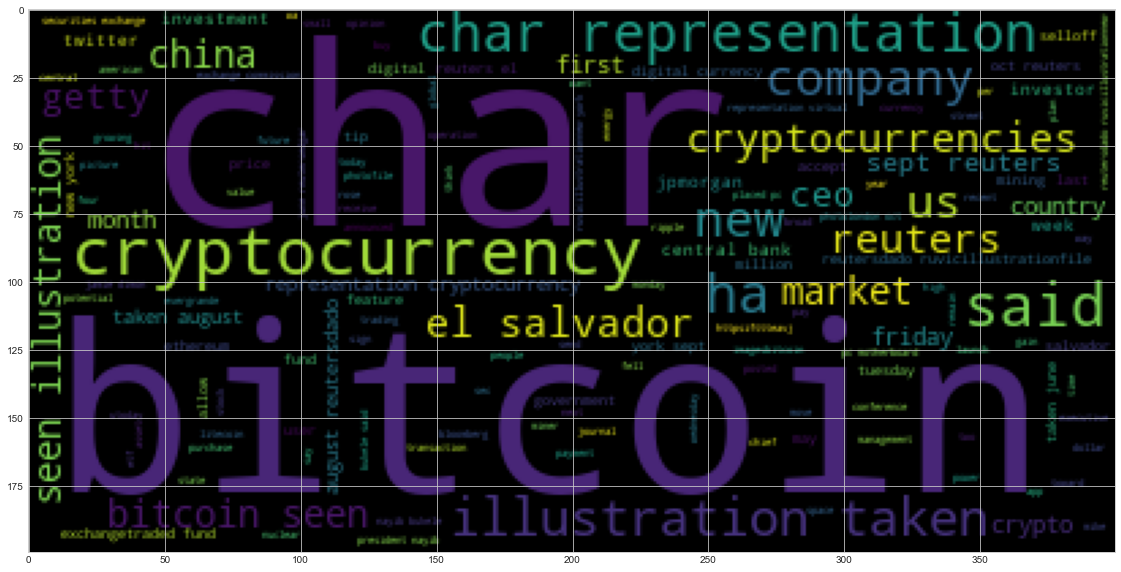

In [92]:
# Generate the Bitcoin word cloud
corpus = btc_tokens

btc_news = ' '.join(corpus)

wc = WordCloud().generate(btc_news)
plt.imshow(wc)

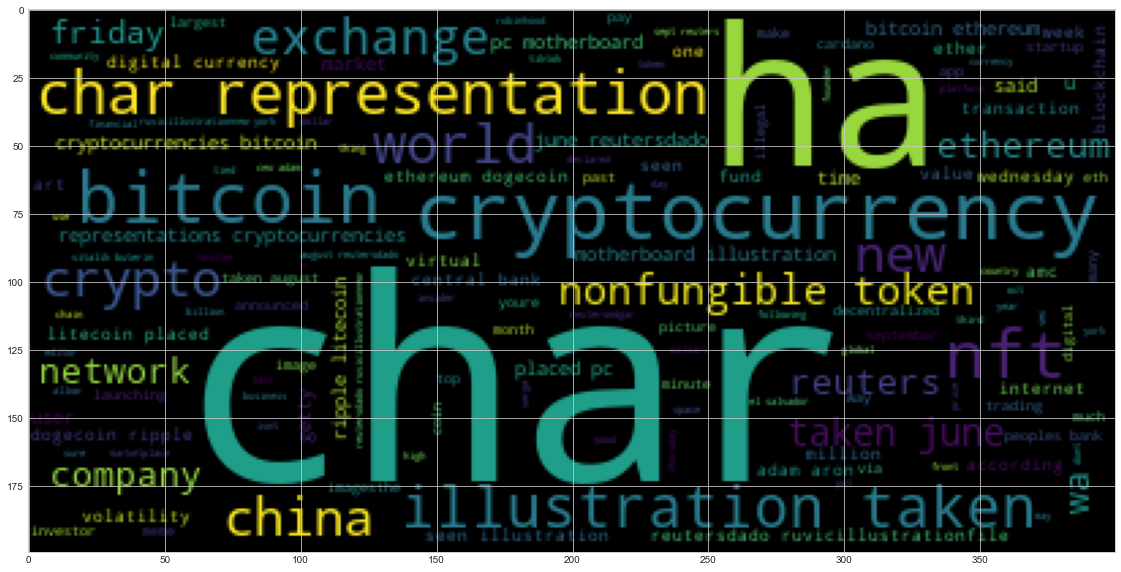

In [93]:
# Generate the Ethereum word cloud
corpus = eth_tokens

eth_news = ' '.join(corpus)

wc = WordCloud().generate(eth_news)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [94]:
import spacy
from spacy import displacy

In [95]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 2.8 MB/s eta 0:00:01
You should consider upgrading via the '/Users/aarticouture/opt/anaconda3/envs/dev/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [96]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [97]:
# Run the NER processor on all of the text
doc = nlp(btc_news)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [98]:
# Render the visualization
displacy.render(doc, style='ent')


In [99]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

four month twitter DATE
first ORDINAL
first ORDINAL
liliit ORG
mark first time PERSON
four week DATE
mps PERSON
jamie dimon PERSON
wednesday DATE
alex castro vergethe peoples PERSON
china GPE
friday DATE
last week DATE
wall street journal ORG
three CARDINAL
el salvador GPE
electro GPE
two decade DATE
august DATE
uk GPE
four CARDINAL
sec ORG
two CARDINAL
kristalina georgieva time PERSON
tuesday DATE
canada GPE
alberta GPE
char securities exchange commission ORG
kellythe us securities exchange commission ORG
four CARDINAL
october DATE
august DATE
amcn PERSON
next month DATE
wednesday DATE
daily DATE
caught minute TIME
today DATE
friday DATE
china GPE
us securities exchange commission ORG
jamie dimon PERSON
jpmorgan chase PERSON
monday DATE
august DATE
reuters ORG
reuters ORG
friday DATE
june DATE
november DATE
june DATE
daily DATE
caught minute TIME
today DATE
january DATE
reuters ORG
george soros PERSON
today yeartodate earlier april DATE
july DATE
bloomberg news ORG
san salvador GPE
re

---

### Ethereum NER

In [100]:
# Run the NER processor on all of the text
doc = nlp(eth_news)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [101]:
# Render the visualization
displacy.render(doc, style='ent')


In [102]:
# List all Entities
for ent in doc.ents:
    print (ent.text, ent.label_)

alex castro vergethe peoples PERSON
china GPE
friday DATE
next month DATE
wednesday DATE
buterinvitalik buterin PERSON
eight CARDINAL
char cardano adasopa PERSON
past weekend DATE
el salvador GPE
nashpoolafp via getty imagessen ORG
elizabeth warren PERSON
ethereums ORG
august DATE
amcn PERSON
hong kong GPE
september DATE
nftrobert nickelsberggetty PERSON
emerged revolutionary force change ORG
past decade DATE
june DATE
ruvicillustrationnew york GPE
oct CARDINAL
reuters ORG
reuters ORG
friday DATE
november DATE
august DATE
june DATE
friday DATE
china GPE
central bank peoples bank ORG
buterin ethereumcrypto eth network PERSON
one year DATE
june DATE
june DATE
reuters ORG
june DATE
suillustrationnew york GPE
million CARDINAL
wednesday DATE
daily DATE
caught minute TIME
today DATE
daily DATE
caught minute TIME
today DATE
alex castro verge collectors PERSON
hundred thousand dollar MONEY
last month DATE
six week DATE
thursday DATE
chinese NORP
compan GPE
reuters ORG
five CARDINAL
london GPE


---